<a href="https://colab.research.google.com/github/neeharika1025/neural-networks/blob/main/case_study_nndl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


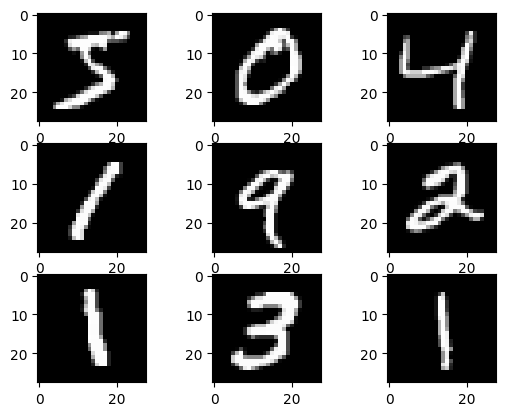

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
trainX, valX, trainy, valy = train_test_split(trainX, trainy, test_size=0.2, random_state=42)

In [ ]:
# Build the CNN model
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(trainX, trainy, epochs=10, validation_data=(valX, valy))


Epoch 1/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2623 - accuracy: 0.9412 - val_loss: 0.0730 - val_accuracy: 0.9785
Epoch 2/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0677 - accuracy: 0.9800 - val_loss: 0.0637 - val_accuracy: 0.9809
Epoch 3/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0541 - accuracy: 0.9836 - val_loss: 0.0631 - val_accuracy: 0.9812
Epoch 4/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0776 - val_accuracy: 0.9775
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0562 - val_accuracy: 0.9861
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0317 - accuracy: 0.9907 - val_loss: 0.0598 - val_accuracy: 0.9840
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0648 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(testX, testy)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0825 - accuracy: 0.9827
Test accuracy: 0.982699990272522


In [ ]:
# Generate classification report
from sklearn.metrics import classification_report
import numpy as np
y_pred = model.predict(testX)
y_pred_classes = [np.argmax(y) for y in y_pred]
print(classification_report(testy, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



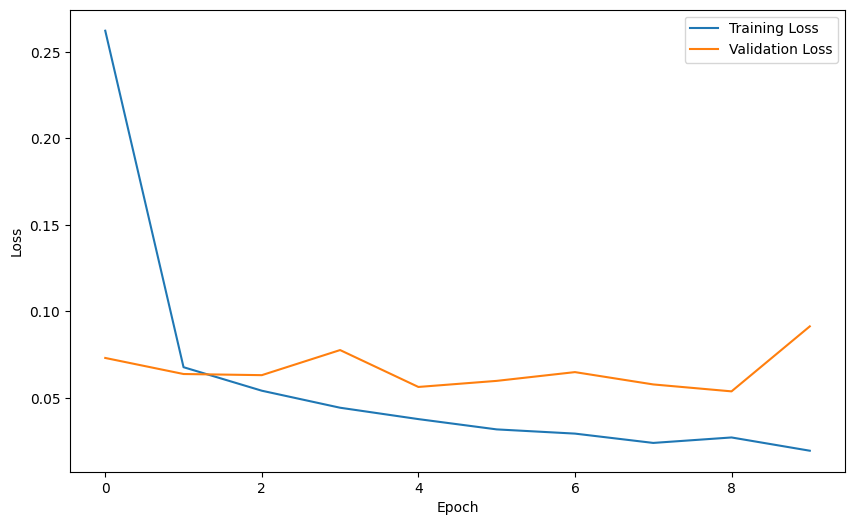

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

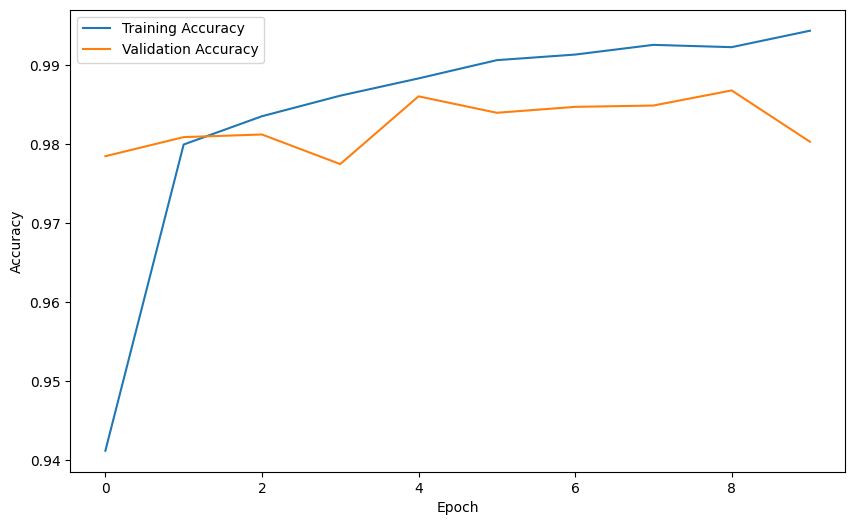

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()